In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

from empath import Empath
lexicon = Empath()

In [13]:
with open("./../data/reddit/cm/analysis/empath.csv", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

In [18]:
df.shape

(13086337, 31)

In [19]:
negative = np.array(df["negative_emotion"])

In [21]:
df.head()

,ID,Comment,Author,Score,Parent id,Publish Date,num,year,month,subreddit,...,suffering,dispute,anger,envy,work,politics,terrorism,shame,confusion,hate
0,c5ef264,Statism and socialism are intrinsically anti-m...,gege33,3,t3_wlomv,2012-07-15 16:49:37,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,0.0,0.0,0.019231
1,c5efzo9,I heard he only accepts payment in bitcoins too.,[deleted],3,t1_c5efqp9,2012-07-15 18:01:38,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,c5hy6e0,:'(,Obsidian_Order,1,t3_ww8wo,2012-07-23 01:04:50,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,c5hy6qg,:'(,Obsidian_Order,1,t3_wx6m1,2012-07-23 01:05:30,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,c5ixr0o,Just how many mods does a 9 person sub need?,MaunaLoona,2,t3_x3uo3,2012-07-24 23:04:18,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [25]:
MGTOW_df = df[df.subreddit == 'MGTOW']

In [26]:
MGTOW_df.head()

,ID,Comment,Author,Score,Parent id,Publish Date,num,year,month,subreddit,...,suffering,dispute,anger,envy,work,politics,terrorism,shame,confusion,hate
0,c5ef264,Statism and socialism are intrinsically anti-m...,gege33,3,t3_wlomv,2012-07-15 16:49:37,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,0.0,0.0,0.019231
1,c5efzo9,I heard he only accepts payment in bitcoins too.,[deleted],3,t1_c5efqp9,2012-07-15 18:01:38,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,c5hy6e0,:'(,Obsidian_Order,1,t3_ww8wo,2012-07-23 01:04:50,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,c5hy6qg,:'(,Obsidian_Order,1,t3_wx6m1,2012-07-23 01:05:30,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,c5ixr0o,Just how many mods does a 9 person sub need?,MaunaLoona,2,t3_x3uo3,2012-07-24 23:04:18,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


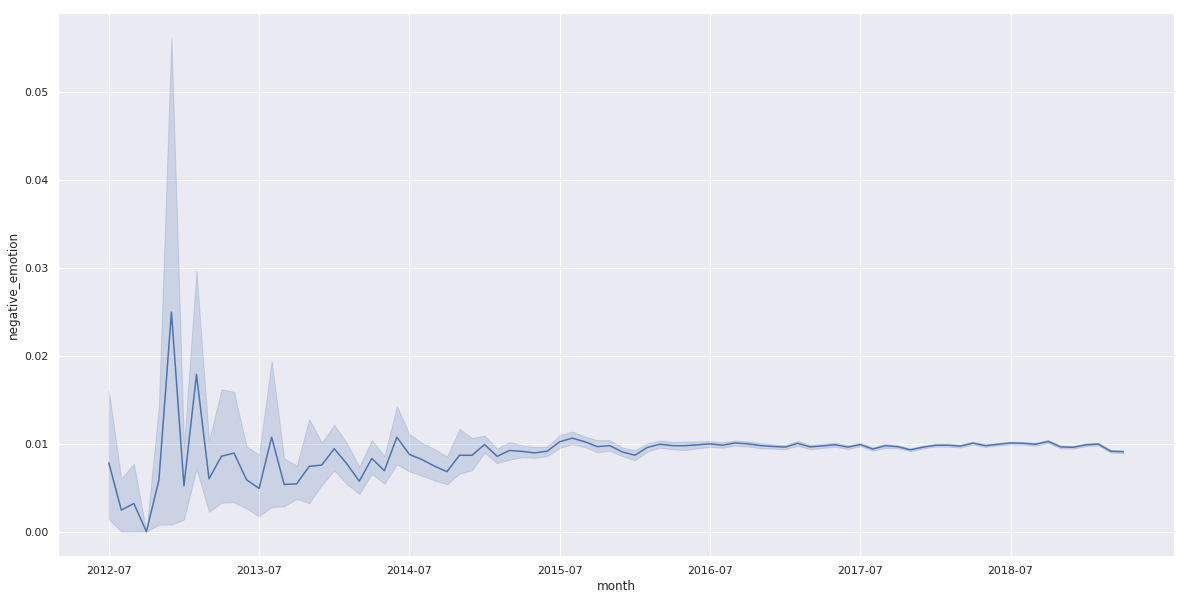

In [31]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="month", y="negative_emotion", data=MGTOW_df)
ax.set(xticks=list(MGTOW_df["month"].drop_duplicates()[::12]))
plt.show()

KeyboardInterrupt: 

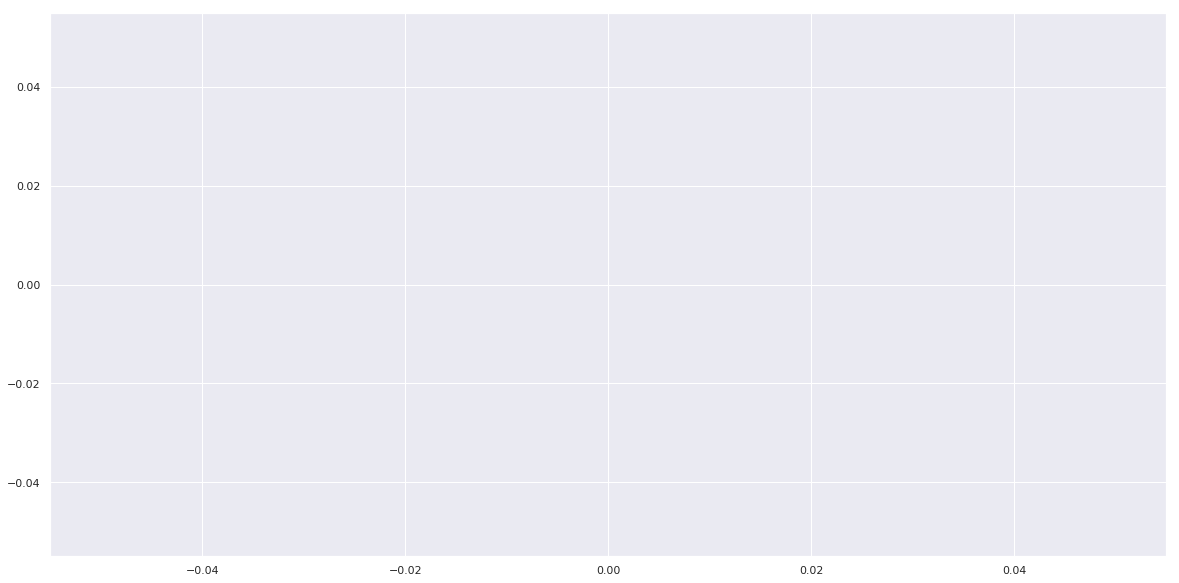

In [32]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="month", y="hate", data=MGTOW_df)
ax.set(xticks=list(MGTOW_df["month"].drop_duplicates()[::12]))
plt.show()